In [31]:
#General purpose packages for data processing
import pandas as pd
import pickle
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
#Collecting data
columns_to_extract = ['CPU Usage', 'Memory Usage', 'IO Usage', 'Process Num', 'Network Bytes Rate', 'Packet Count', 'GPS X Offset', 'GPS Y Offset']
combined_data = pd.read_csv('Combined_Training_Dataset_for_AI_Monitor.csv')

In [33]:
#---------EVALUATING MULTIPLE MODELS, TESTING WITH WEAPONS ICS-------------------#

# Features and labels
X = combined_data[columns_to_extract]  # Features
y = combined_data['Attack_Type']       # Labels
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Support Vector Classifier': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
}

In [35]:
# Results container
results = {}


--- Evaluating Random Forest ---
Accuracy: 0.9995
F1-Score: 0.9995


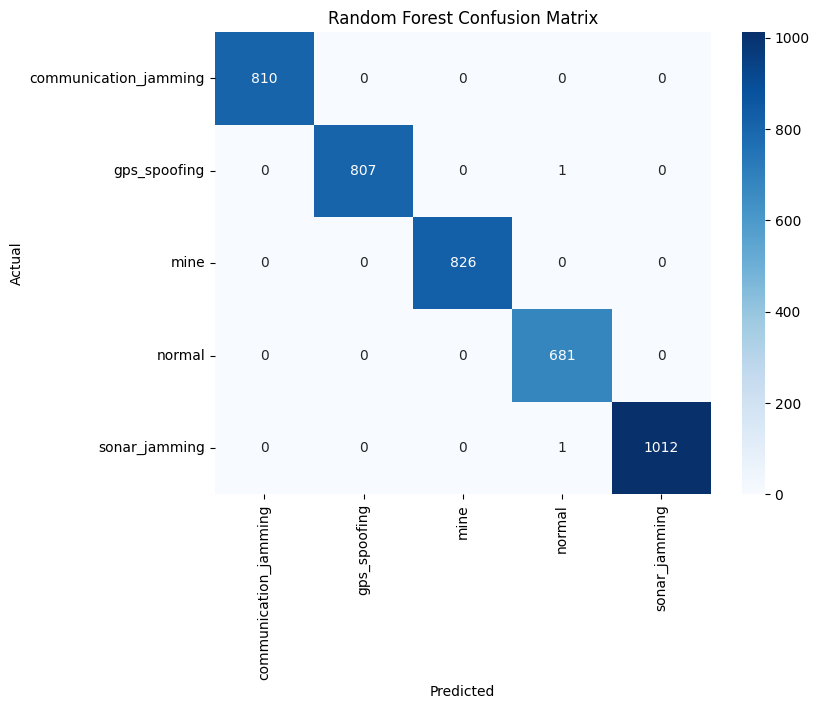


--- Evaluating Support Vector Classifier ---
Accuracy: 0.9993
F1-Score: 0.9993


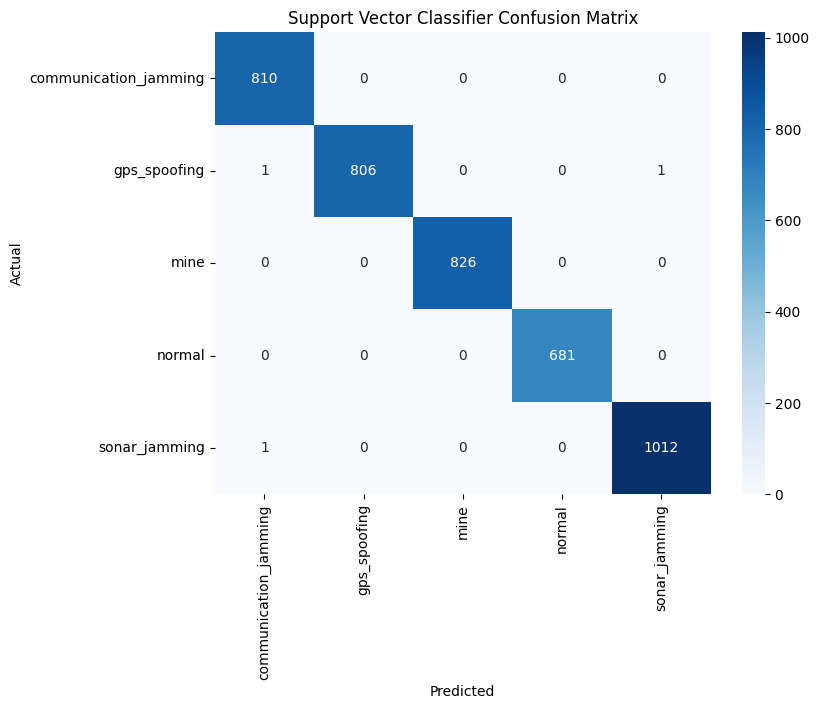


--- Evaluating K-Nearest Neighbors ---
Accuracy: 0.9993
F1-Score: 0.9993


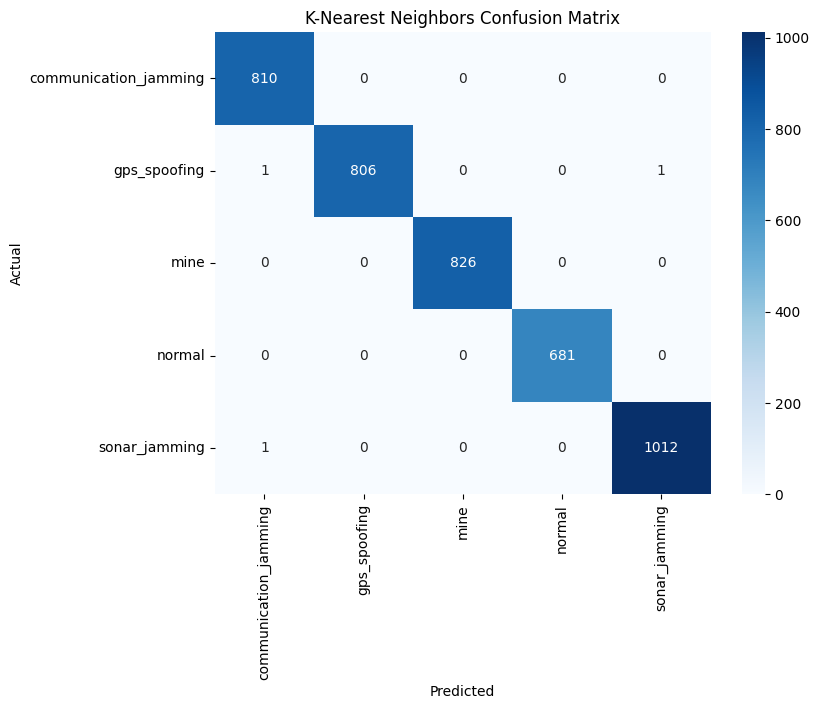


--- Evaluating Logistic Regression ---
Accuracy: 0.9995
F1-Score: 0.9995


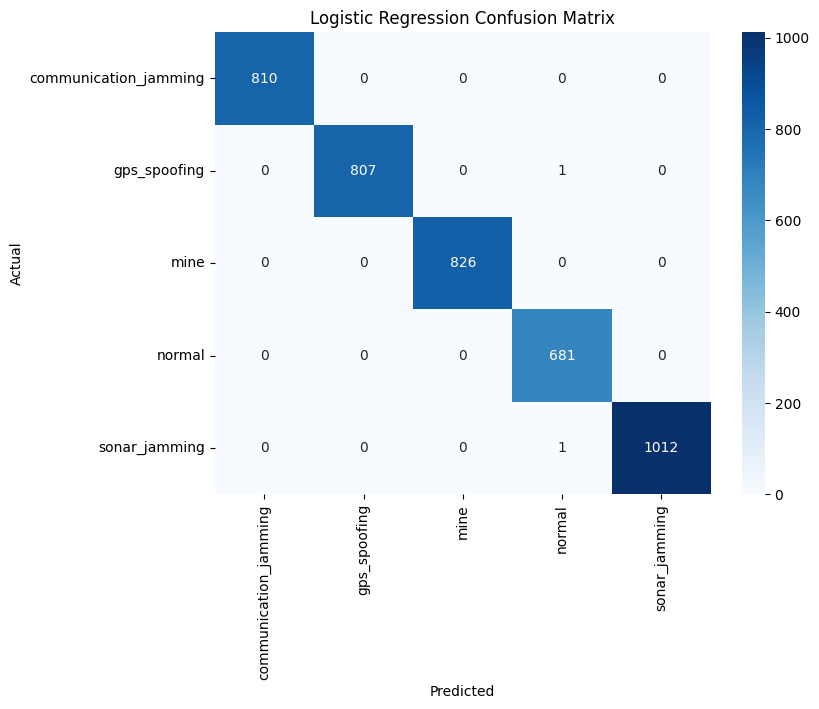

In [36]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
    
    
    # Save results
    results[name] = {
        'Confusion Matrix': conf_matrix,
        'Accuracy': acc,
    }
    
    # Display metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [116]:
# Output the results
results_df = pd.DataFrame(results)

# Save the comparison DataFrame as CSV
comparison_df.to_csv('weapons_actual_vs_predicted.csv', index=False)

In [117]:
# Display results
print("Accuracy and MSE results for each model:")
print(results_df)
print("\nActual vs Predicted saved as weapons_actual_vs_predicted.csv")

Accuracy and MSE results for each model:
          Model  Accuracy  Mean Squared Error    Confusion Matrix
0  RandomForest       1.0                 0.0  [[10, 0], [0, 24]]
1           SVM       1.0                 0.0  [[10, 0], [0, 24]]
2           KNN       1.0                 0.0  [[10, 0], [0, 24]]

Actual vs Predicted saved as weapons_actual_vs_predicted.csv


In [90]:
#------CONCLUSION-------#
# All models performed well in test scenario. We will use random forest since we anticipate it to be easier to work with in a range of anomalous scenarios, and it is capabale of working well with realtime data.

In [131]:
# Assuming combined_weapons DataFrame is already prepared from previous code
X_weapons = combined_weapons[['CPU %', 'CPU Time', 'Memory Usage', 'Network Bytes Rate', 'Network Packets Rate', 'Network Connections']]
y_weapons = combined_weapons['Label'].apply(lambda x: 1 if x == 'anomalous' else 0)  # 1 for anomalous, 0 for normal
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_weapons, y_weapons, test_size=0.3, random_state=42)

In [132]:
#---------WEAPONS SYSTEM MODEL TRAINING AND CREATION--------------#
#Actually creating the weapons system .pkl file and training using random forest
# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
# double checking model accuracy
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

Random Forest Model Accuracy: 1.00


In [134]:
# Save the model as a .pkl file
model_filename = 'ICS_weapons_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f"Random Forest model saved as {model_filename}")

Random Forest model saved as ICS_weapons_model.pkl


In [135]:
#---------NAVIGATION SYSTEM MODEL TRAINING AND CREATION--------------#
X_navigation = combined_navigation[['CPU %', 'CPU Time', 'Memory Usage', 'Network Bytes Rate', 'Network Packets Rate', 'Network Connections']]
y_navigation = combined_navigation['Label'].apply(lambda x: 1 if x == 'anomalous' else 0)  # 1 for anomalous, 0 for normal
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_navigation, y_navigation, test_size=0.3, random_state=42)

In [136]:
# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [137]:
# Evaluate the model (optional, to confirm the accuracy)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

Random Forest Model Accuracy: 0.97


In [139]:
# Save the model as a .pkl file
model_filename = 'ICS_navigation_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f"Random Forest model saved as {model_filename}")

Random Forest model saved as ICS_navigation_model.pkl


In [140]:
#---------PROPULSION SYSTEM MODEL TRAINING AND CREATION--------------#
X_propulsion = combined_propulsion[['CPU %', 'CPU Time', 'Memory Usage', 'Network Bytes Rate', 'Network Packets Rate', 'Network Connections']]
y_propulsion = combined_propulsion['Label'].apply(lambda x: 1 if x == 'anomalous' else 0)  # 1 for anomalous, 0 for normal
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_propulsion, y_propulsion, test_size=0.3, random_state=42)

In [141]:
# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
# Evaluate the model (optional, to confirm the accuracy)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

Random Forest Model Accuracy: 1.00


In [143]:
# Save the model as a .pkl file
model_filename = 'ICS_propulsion_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f"Random Forest model saved as {model_filename}")

Random Forest model saved as ICS_propulsion_model.pkl


In [144]:
#---------POWER SYSTEM MODEL TRAINING AND CREATION--------------#
X_power = combined_power[['CPU %', 'CPU Time', 'Memory Usage', 'Network Bytes Rate', 'Network Packets Rate', 'Network Connections']]
y_power = combined_power['Label'].apply(lambda x: 1 if x == 'anomalous' else 0)  # 1 for anomalous, 0 for normal
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_power, y_power, test_size=0.3, random_state=42)

In [145]:
# Train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# Evaluate the model (optional, to confirm the accuracy)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

Random Forest Model Accuracy: 1.00


In [147]:
# Save the model as a .pkl file
model_filename = 'ICS_power_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f"Random Forest model saved as {model_filename}")

Random Forest model saved as ICS_power_model.pkl
